In [28]:
import pandas as pd
#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [29]:
point = r"edgedata_5sec.csv"
df = pd.read_csv(point)

In [30]:
df.head()

,interval_begin,interval_end,interval_id,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,900,905,1,0,23.85,5,0,1,4,4,3,3.17,66.80,153.29,19.30,66.61,0.0
1,900,905,1,3,32.77,4,2,10,4,4,1,4.36,100.58,307.61,18.70,100.35,0.0
2,900,905,1,0,189.20,0,1,11,0,0,4,12.42,247.18,143.62,0.63,290.70,114.0
3,900,905,1,0,2.27,0,1,12,0,0,0,0.27,36.99,4.25,10.22,36.60,0.0
4,900,905,1,1,10.60,0,0,13,0,0,0,1.41,63.04,64.70,19.43,62.82,0.0


In [31]:
df.columns

Index(['interval_begin', 'interval_end', 'interval_id', 'edge_arrived',
       'edge_density', 'edge_departed', 'edge_entered', 'edge_id',
       'edge_laneChangedFrom', 'edge_laneChangedTo', 'edge_left',
       'edge_occupancy', 'edge_overlapTraveltime', 'edge_sampledSeconds',
       'edge_speed', 'edge_traveltime', 'edge_waitingTime'],
      dtype='object')

In [32]:
# checking null values 'edge_density', 'edge_occupancy', 'edge_overlapTraveltime', edge_speed', 'edge_traveltime', 'edge_waitingTime

In [33]:
df.isnull().sum()

interval_begin               0
interval_end                 0
interval_id                  0
edge_arrived                 0
edge_density               931
edge_departed                0
edge_entered                 0
edge_id                      0
edge_laneChangedFrom         0
edge_laneChangedTo           0
edge_left                    0
edge_occupancy             931
edge_overlapTraveltime     931
edge_sampledSeconds          0
edge_speed                 931
edge_traveltime           1104
edge_waitingTime           931
dtype: int64

# boxplot of variables on raw data 

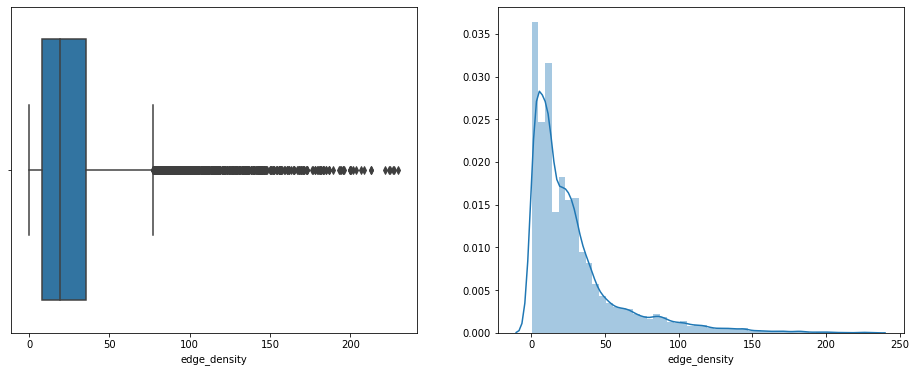

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_density)
plt.subplot(1,2,2)
sns.distplot(df.edge_density)
# Distribution plot
#



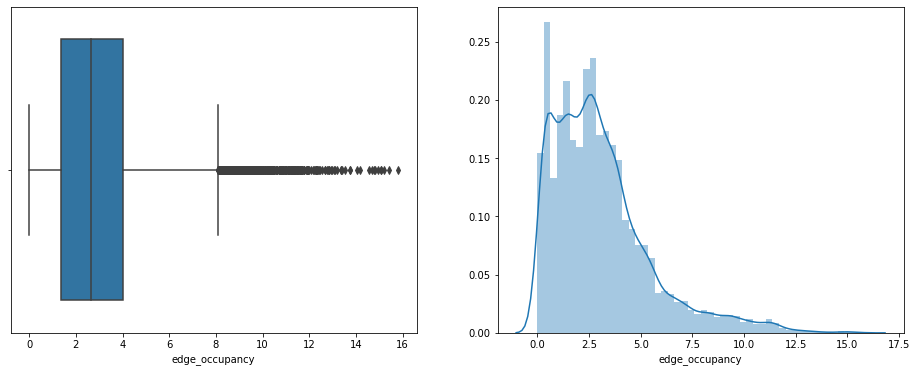

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_occupancy)
plt.subplot(1,2,2)
sns.distplot(df.edge_occupancy)
# Distribution plot
#


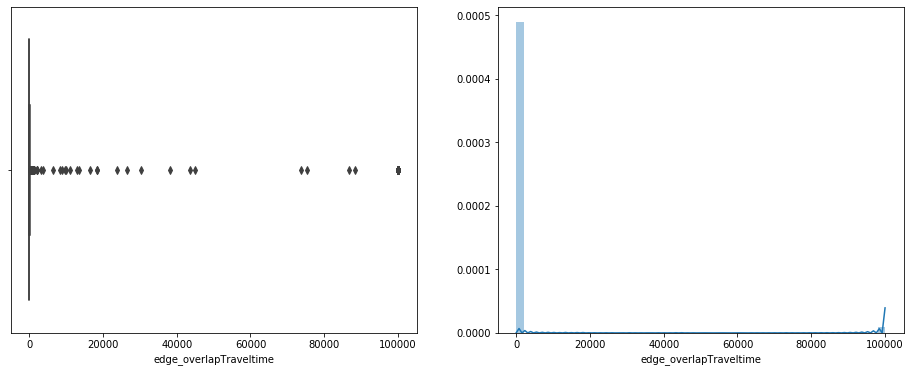

In [36]:
#'edge_overlapTraveltime', edge_speed', 'edge_traveltime', 'edge_waitingTime
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_overlapTraveltime)
plt.subplot(1,2,2)
sns.distplot(df.edge_overlapTraveltime)
# Distribution plot
#


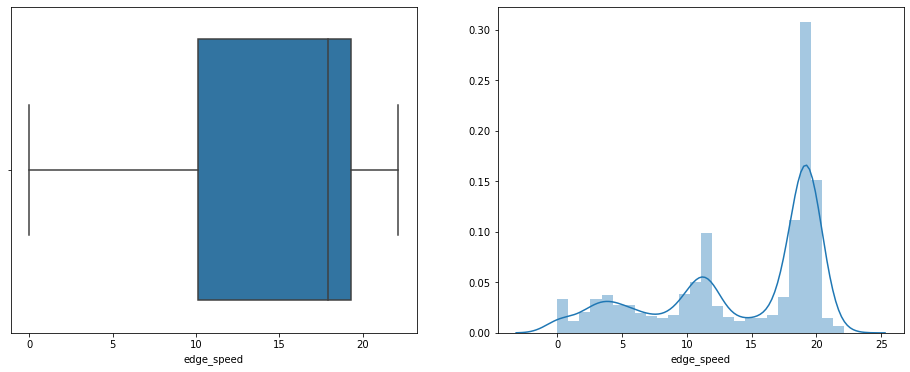

In [37]:
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_speed)
plt.subplot(1,2,2)
sns.distplot(df.edge_speed)

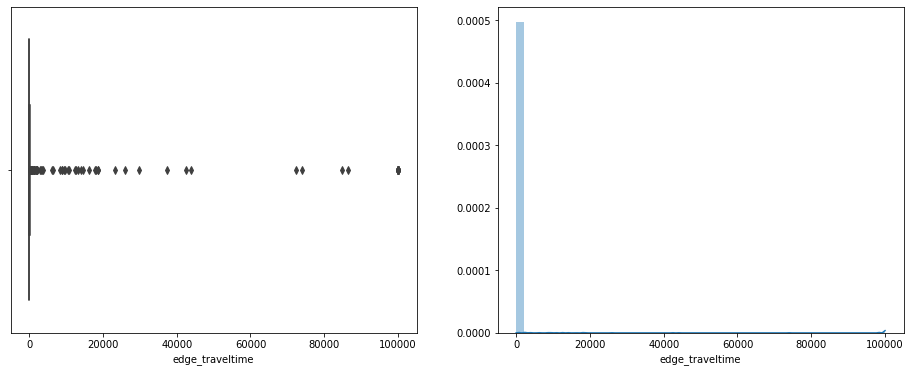

In [38]:
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_traveltime)
plt.subplot(1,2,2)
sns.distplot(df.edge_traveltime)

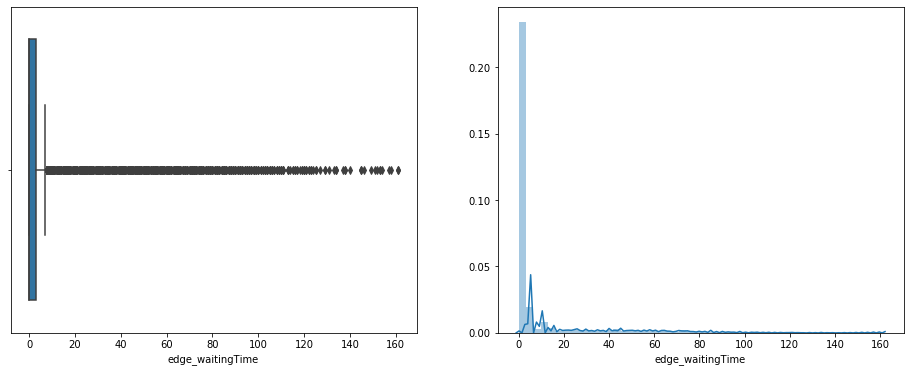

In [39]:
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df.edge_waitingTime)
plt.subplot(1,2,2)
sns.distplot(df.edge_waitingTime)

# data imputation

In [40]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [41]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = df.to_numpy()
imputer = KNNImputer(n_neighbors=3, weights="uniform")
y = imputer.fit_transform(X)
type(y)

numpy.ndarray

In [42]:
df2 = pd.DataFrame(y, columns = ['interval_begin', 'interval_end', 'interval_id', 'edge_arrived',
       'edge_density', 'edge_departed', 'edge_entered', 'edge_id',
       'edge_laneChangedFrom', 'edge_laneChangedTo', 'edge_left',
       'edge_occupancy', 'edge_overlapTraveltime', 'edge_sampledSeconds',
       'edge_speed', 'edge_traveltime', 'edge_waitingTime'])

In [43]:
df2.head()

,interval_begin,interval_end,interval_id,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,900.0,905.0,1.0,0.0,23.85,5.0,0.0,1.0,4.0,4.0,3.0,3.17,66.80,153.29,19.30,66.61,0.0
1,900.0,905.0,1.0,3.0,32.77,4.0,2.0,10.0,4.0,4.0,1.0,4.36,100.58,307.61,18.70,100.35,0.0
2,900.0,905.0,1.0,0.0,189.20,0.0,1.0,11.0,0.0,0.0,4.0,12.42,247.18,143.62,0.63,290.70,114.0
3,900.0,905.0,1.0,0.0,2.27,0.0,1.0,12.0,0.0,0.0,0.0,0.27,36.99,4.25,10.22,36.60,0.0
4,900.0,905.0,1.0,1.0,10.60,0.0,0.0,13.0,0.0,0.0,0.0,1.41,63.04,64.70,19.43,62.82,0.0


In [44]:
len(df2)

10080

# filtering the dataset for some variables

In [45]:

df2.to_csv(r"edgedata_after_imputation_knn.csv")

In [46]:
newdf = df2[(df2.edge_traveltime <= 200)]

In [47]:
len(newdf)

9722

In [48]:
newdf = newdf[(newdf.edge_overlapTraveltime <= 200)]
len(newdf)

9524

In [49]:
newdf = newdf[(newdf.edge_density <= 150)]
len(newdf)

9439

In [50]:
newdf = newdf[(newdf.edge_sampledSeconds <= 250)]
len(newdf)

9047

In [51]:
newdf.isnull().sum()

interval_begin            0
interval_end              0
interval_id               0
edge_arrived              0
edge_density              0
edge_departed             0
edge_entered              0
edge_id                   0
edge_laneChangedFrom      0
edge_laneChangedTo        0
edge_left                 0
edge_occupancy            0
edge_overlapTraveltime    0
edge_sampledSeconds       0
edge_speed                0
edge_traveltime           0
edge_waitingTime          0
dtype: int64

# plots on processed data

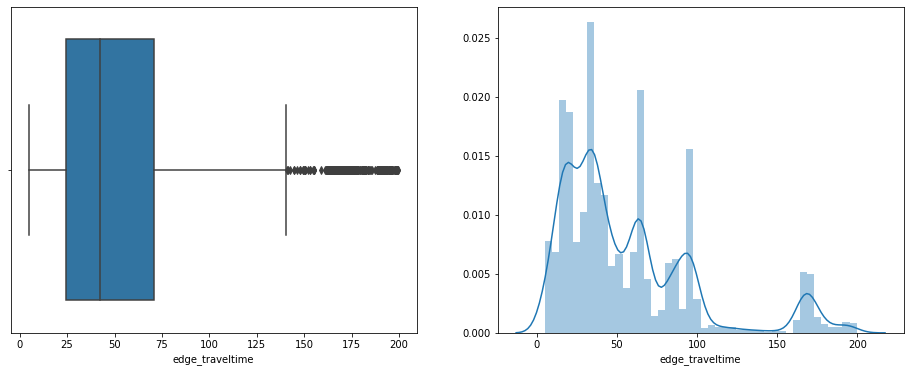

In [52]:
fig= plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(newdf.edge_traveltime)
plt.subplot(1,2,2)
sns.distplot(newdf.edge_traveltime)

In [53]:

newdf.to_csv(r"processed_df.csv")

In [54]:
9047/10080

0.8975198412698413

In [55]:
newdf.head()

,interval_begin,interval_end,interval_id,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,900.0,905.0,1.0,0.0,23.85,5.0,0.0,1.0,4.0,4.0,3.0,3.17,66.80,153.29,19.30,66.61,0.0
3,900.0,905.0,1.0,0.0,2.27,0.0,1.0,12.0,0.0,0.0,0.0,0.27,36.99,4.25,10.22,36.60,0.0
4,900.0,905.0,1.0,1.0,10.60,0.0,0.0,13.0,0.0,0.0,0.0,1.41,63.04,64.70,19.43,62.82,0.0
5,900.0,905.0,1.0,0.0,15.58,4.0,0.0,14.0,2.0,2.0,1.0,3.11,96.74,144.28,19.18,96.52,0.0
6,900.0,905.0,1.0,0.0,51.23,0.0,1.0,15.0,0.0,0.0,0.0,4.07,52.60,74.08,5.57,51.71,45.0


In [56]:
#newdf.drop(['interval_begin','interval_end','interval_id'],1,inplace=True)
newdf1 = newdf.copy()

In [57]:
newdf1.drop(['interval_begin','interval_end','interval_id'],1,inplace=True)
newdf1.head()

,edge_arrived,edge_density,edge_departed,edge_entered,edge_id,edge_laneChangedFrom,edge_laneChangedTo,edge_left,edge_occupancy,edge_overlapTraveltime,edge_sampledSeconds,edge_speed,edge_traveltime,edge_waitingTime
0,0.0,23.85,5.0,0.0,1.0,4.0,4.0,3.0,3.17,66.80,153.29,19.30,66.61,0.0
3,0.0,2.27,0.0,1.0,12.0,0.0,0.0,0.0,0.27,36.99,4.25,10.22,36.60,0.0
4,1.0,10.60,0.0,0.0,13.0,0.0,0.0,0.0,1.41,63.04,64.70,19.43,62.82,0.0
5,0.0,15.58,4.0,0.0,14.0,2.0,2.0,1.0,3.11,96.74,144.28,19.18,96.52,0.0
6,0.0,51.23,0.0,1.0,15.0,0.0,0.0,0.0,4.07,52.60,74.08,5.57,51.71,45.0


# plots on processed df data

## boxplot of travel time for different edges

Text(0, 0.5, 'Travel Time')

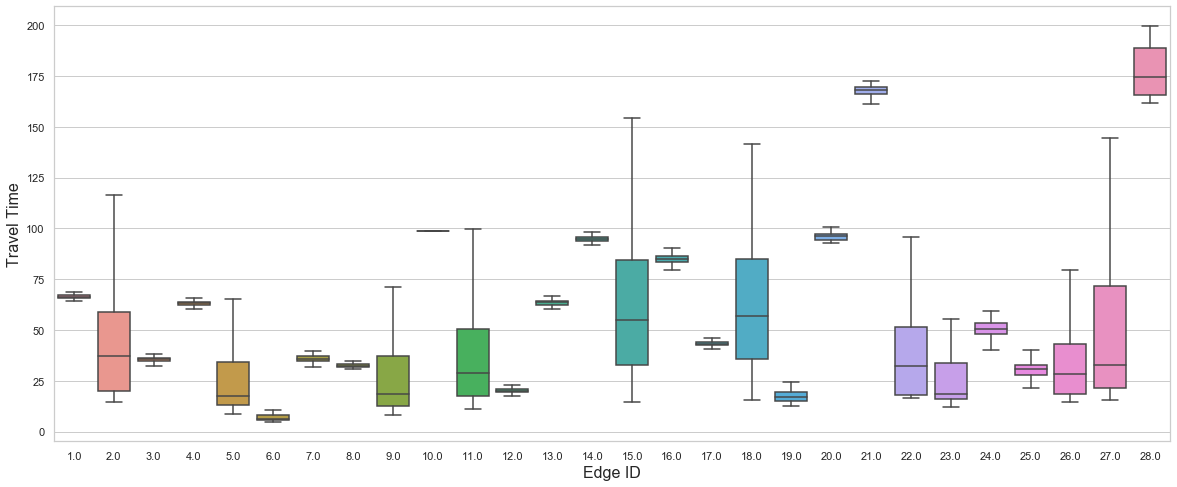

In [58]:
import matplotlib.pyplot as plt
newdf['edge_id'] = newdf1['edge_id'].astype(float)
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(20, 8)
sns.set(style="whitegrid")
c =sns.boxplot(x="edge_id", y="edge_traveltime", data=newdf, showfliers = False)
c.set_xlabel('Edge ID',size=16)
c.set_ylabel('Travel Time',size=16)
#c.set_title('Volume vs. Occupancy', size=18)


# Histogram of response variable

Text(0.5, 1.0, 'Histogram of Edge Travel Time')

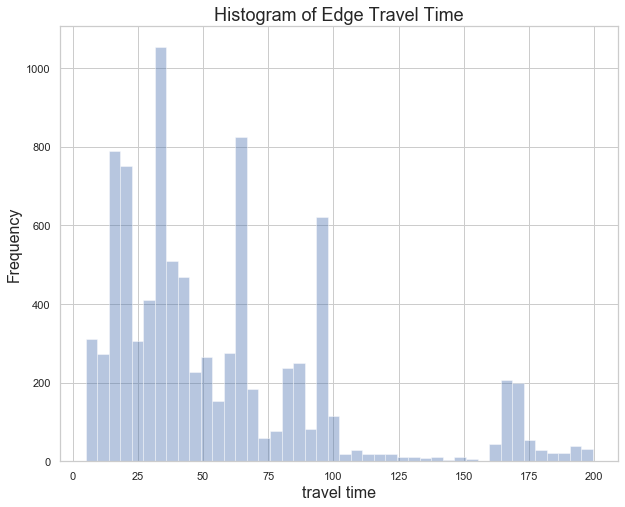

In [59]:
fig, ax_2=plt.subplots(figsize=(10,8))
#ax_2 = sns.barplot(x="day", y="volume", data=df)
ax_2= sns.distplot(newdf['edge_traveltime'],kde = False)
ax_2.set_xlabel('travel time',size=16)
ax_2.set_ylabel('Frequency',size=16)
ax_2.set_title('Histogram of Edge Travel Time', size=18)


# Q-Q plot

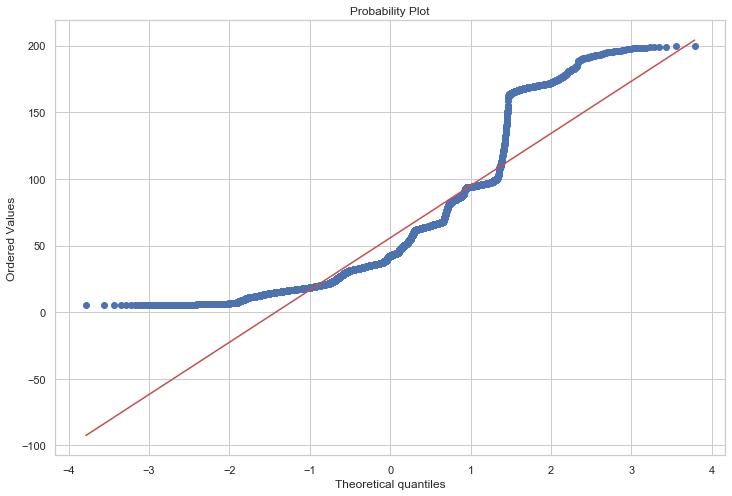

In [60]:
import pylab 
import scipy.stats as stats

fig, ax_10=plt.subplots(figsize=(12,8))

stats.probplot(newdf['edge_traveltime'], dist="norm", plot=pylab)
pylab.show()

Text(0.5, 1, 'Correlation plot of Variables')

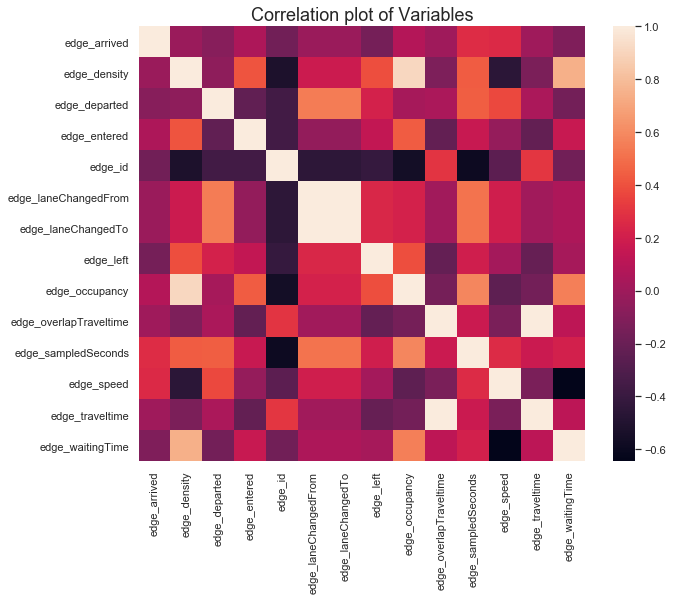

In [61]:
fig, ax_2=plt.subplots(figsize=(10,8))
#ax_2 = sns.barplot(x="day", y="volume", data=df)
ax_2 = sns.heatmap(newdf1.corr())
ax_2.set_title('Correlation plot of Variables', size=18)

In [62]:
newdf.columns



Index(['interval_begin', 'interval_end', 'interval_id', 'edge_arrived',
       'edge_density', 'edge_departed', 'edge_entered', 'edge_id',
       'edge_laneChangedFrom', 'edge_laneChangedTo', 'edge_left',
       'edge_occupancy', 'edge_overlapTraveltime', 'edge_sampledSeconds',
       'edge_speed', 'edge_traveltime', 'edge_waitingTime'],
      dtype='object')

# Scatter matrix plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015852F439E8>,
      dtype=object)

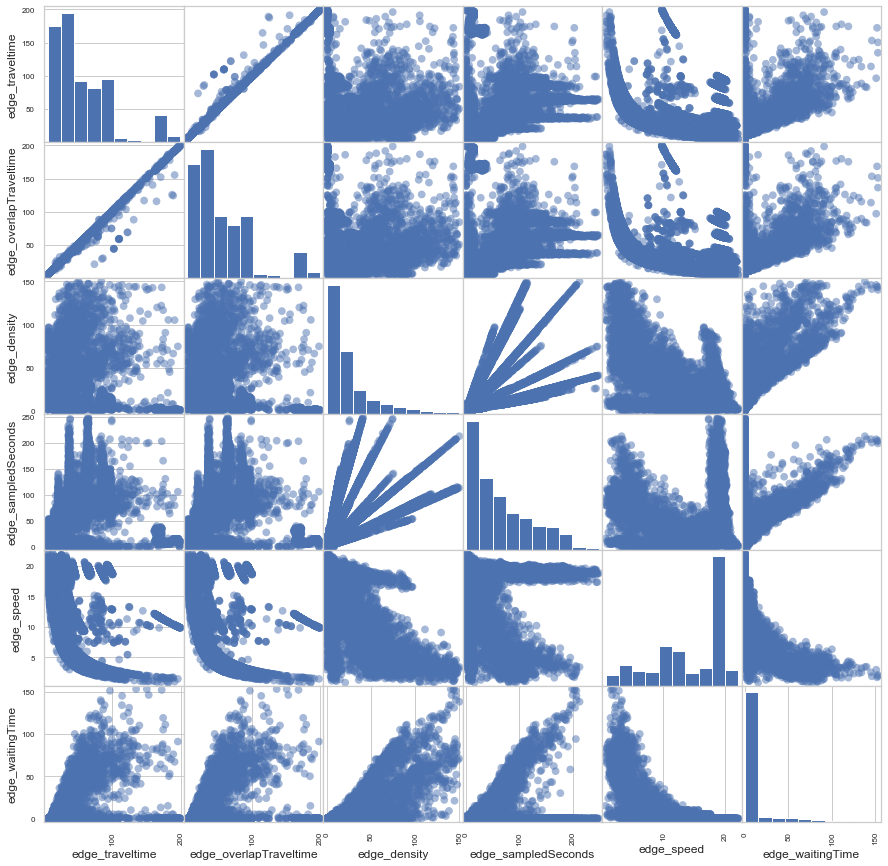

In [63]:
new_dataset = newdf[['edge_traveltime','edge_overlapTraveltime','edge_density', 'edge_sampledSeconds', 'edge_speed',  'edge_waitingTime']]
pd.plotting.scatter_matrix(new_dataset, figsize=(15,15), marker='o', hist_kwds={'bins': 10}, s=60, alpha=.5)


In [64]:
newdf2 = newdf.loc[(newdf.edge_id <= 4.0)] 
newdf2['edge_id'] = newdf2['edge_id'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
len(newdf2)

1399

# plot of travel time in different edges for 30 minutes(1800 seconds)

Text(0, 0.5, 'Travel Time')

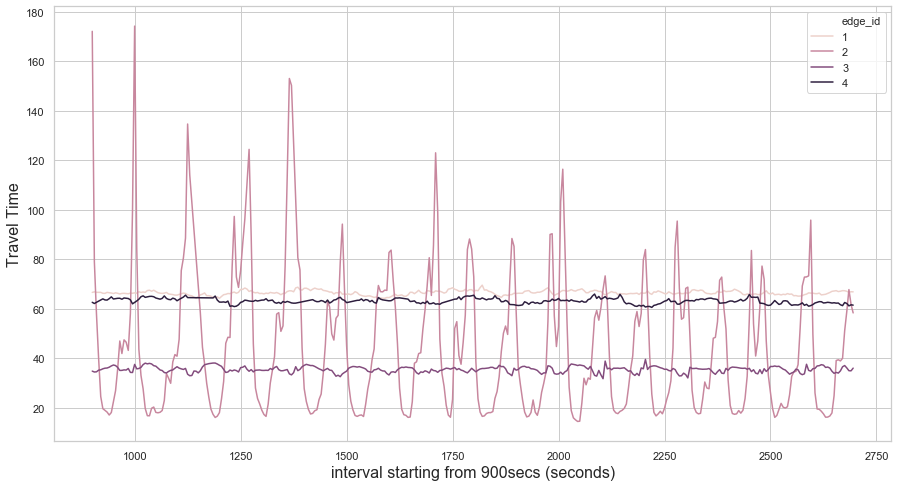

In [66]:
fig, ax_2=plt.subplots(figsize=(15,8))
#c =sns.boxplot(x="edge_id", y="edge_traveltime", data=newdf, showfliers = False)

ax_2 =sns.lineplot(x = newdf2.interval_begin, y = newdf2.edge_traveltime, hue = newdf2.edge_id)
ax_2.set_xlabel('interval starting from 900secs (seconds)',size=16)
ax_2.set_ylabel('Travel Time',size=16)

In [67]:
df = pd.read_csv('processed_df.csv')

0.5316420622553238


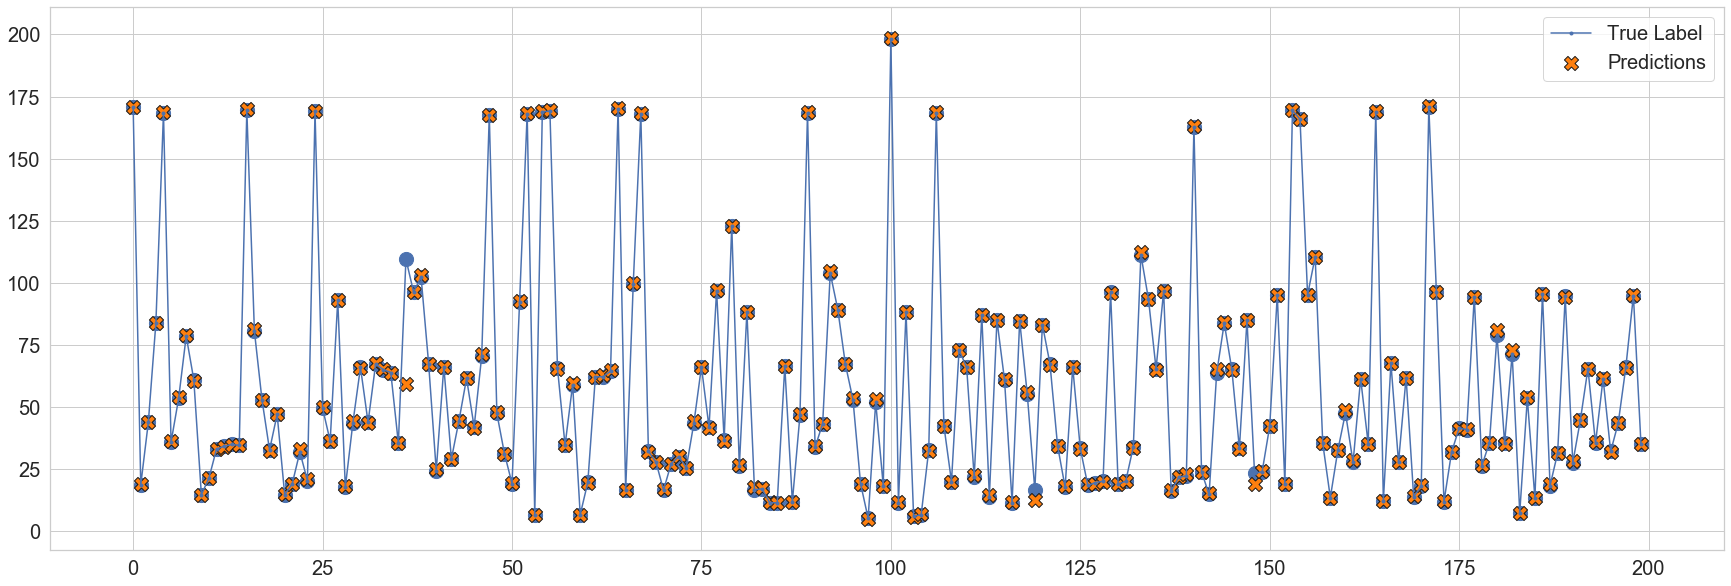

In [68]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# load data
dataset = df
# split data into X and y
X = dataset.drop(columns='edge_traveltime')
Y = dataset['edge_traveltime']
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = LinearRegression()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)

print(mae)

import matplotlib.pyplot as plt
x = [i for i in range(200)]
plt.figure(figsize=(30,10))
plt.scatter(x,y_test[0:200], s = 200)
plt.plot(x,y_test[0:200],
         label='True Label', marker='.')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y_pred[0:200],
          marker='X', edgecolors='k', label='Predictions',
          c='#ff7f0e', s=200)
plt.legend(fontsize=20)
plt.savefig('1.png', dpi=200)

0.5316417889677966


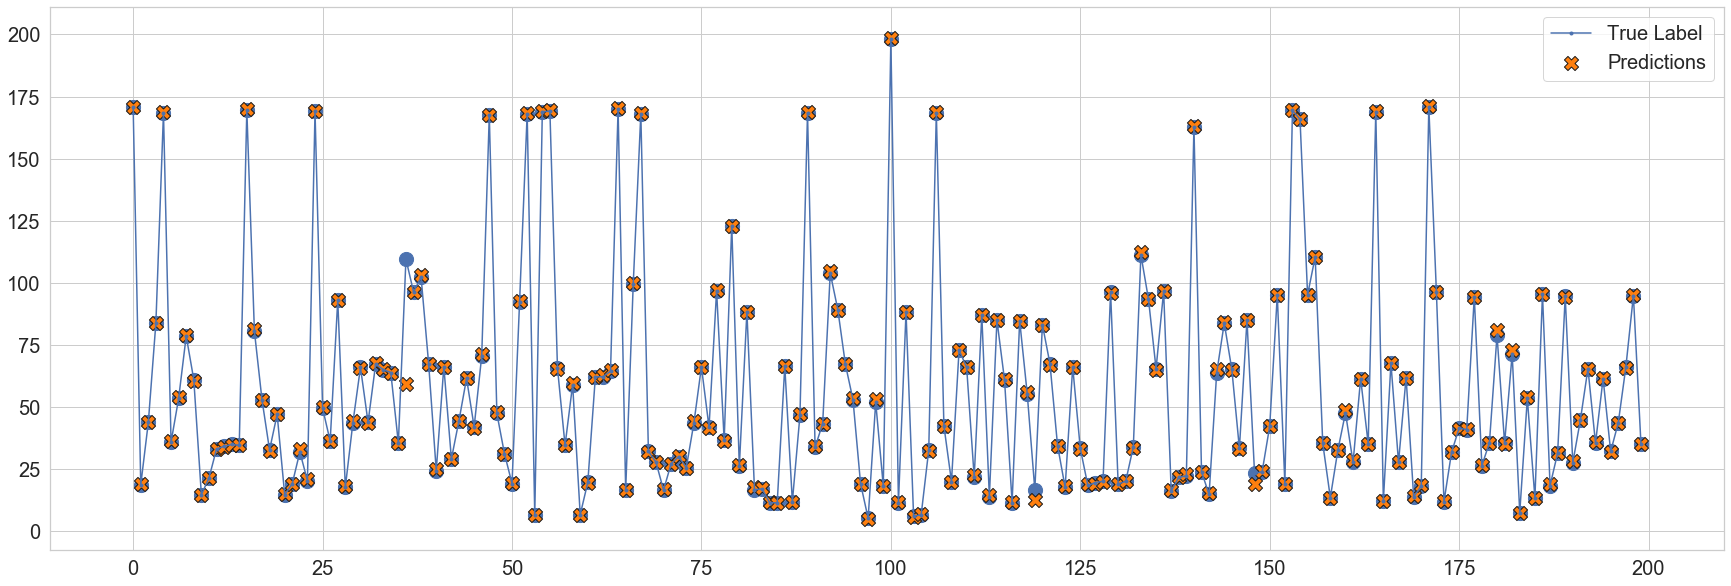

In [69]:
from sklearn.linear_model import Ridge
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# load data
dataset = df
# split data into X and y
X = dataset.drop(columns='edge_traveltime')
Y = dataset['edge_traveltime']
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)

print(mae)

import matplotlib.pyplot as plt
x = [i for i in range(200)]
plt.figure(figsize=(30,10))
plt.scatter(x,y_test[0:200], s = 200)
plt.plot(x,y_test[0:200],
         label='True Label', marker='.')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y_pred[0:200],
          marker='X', edgecolors='k', label='Predictions',
          c='#ff7f0e', s=200)
plt.legend(fontsize=20)
plt.savefig('2.png', dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6333.571973555059, tolerance: 1313.5671879264073
  positive)


0.5077090026865139


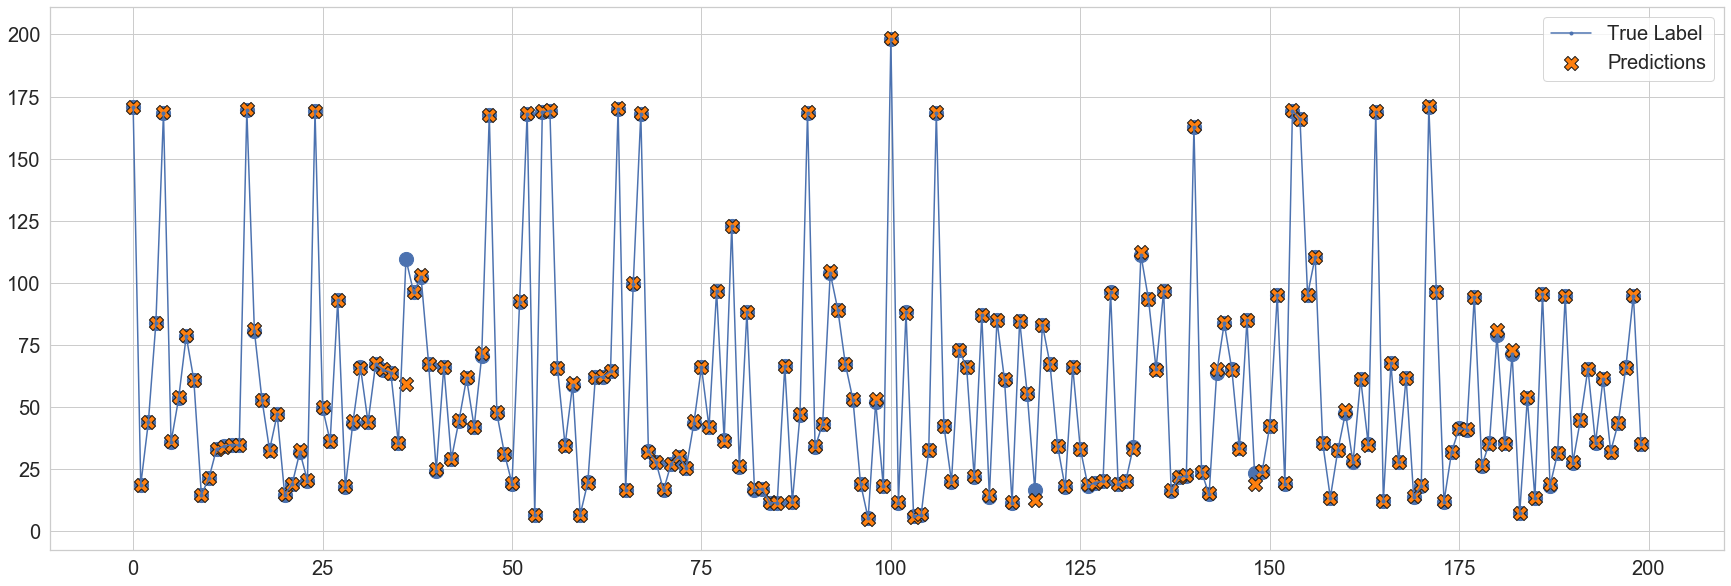

In [70]:
from sklearn.linear_model import Lasso
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# load data
dataset = df
# split data into X and y
X = dataset.drop(columns='edge_traveltime')
Y = dataset['edge_traveltime']
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)

print(mae)

import matplotlib.pyplot as plt
x = [i for i in range(200)]
plt.figure(figsize=(30,10))
plt.scatter(x,y_test[0:200], s = 200)
plt.plot(x,y_test[0:200],
         label='True Label', marker='.')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y_pred[0:200],
          marker='X', edgecolors='k', label='Predictions',
          c='#ff7f0e', s=200)
plt.legend(fontsize=20)
plt.savefig('3.png', dpi=200)


8.557270534069982


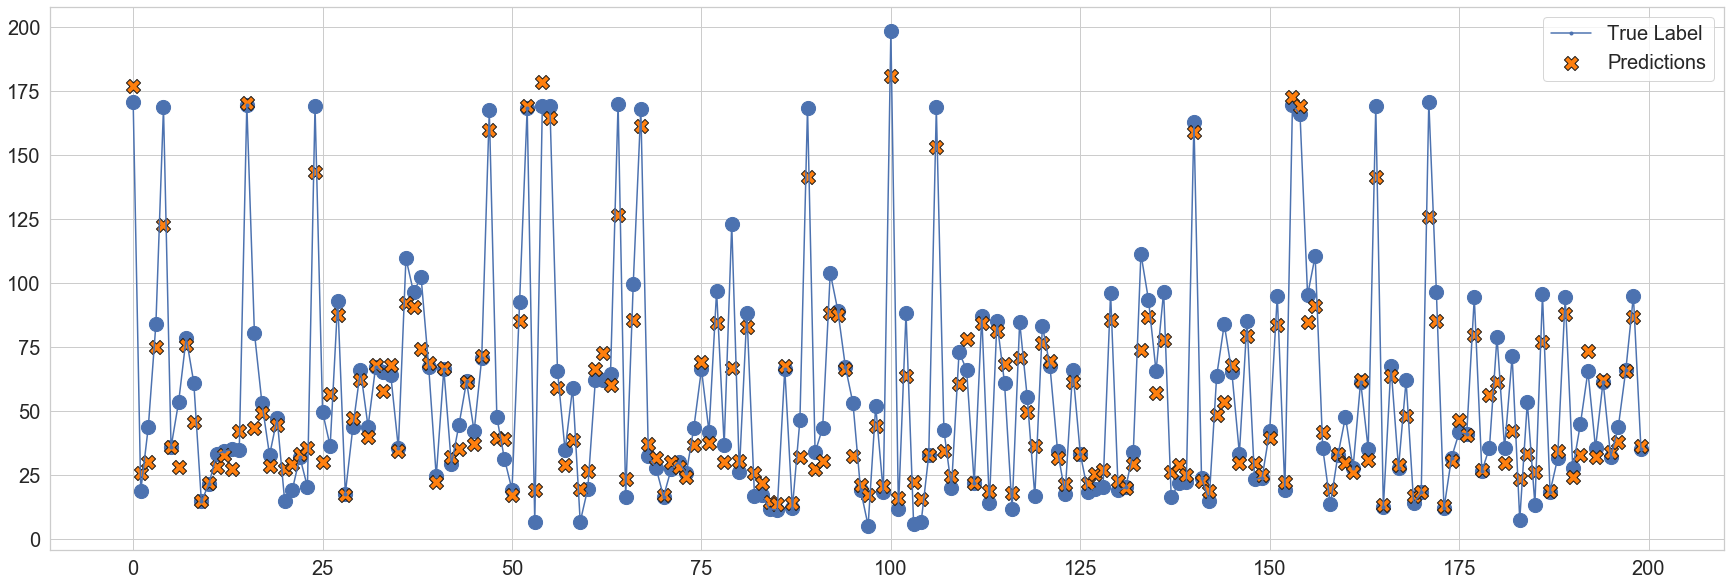

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# load data
dataset = df
# split data into X and y
X = dataset.drop(columns='edge_traveltime')
Y = dataset['edge_traveltime']
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)

print(mae)

import matplotlib.pyplot as plt
x = [i for i in range(200)]
plt.figure(figsize=(30,10))
plt.scatter(x,y_test[0:200], s = 200)
plt.plot(x,y_test[0:200],
         label='True Label', marker='.')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y_pred[0:200],
          marker='X', edgecolors='k', label='Predictions',
          c='#ff7f0e', s=200)
plt.legend(fontsize=20)
plt.savefig('4.png', dpi=200)

0.4014447697974222


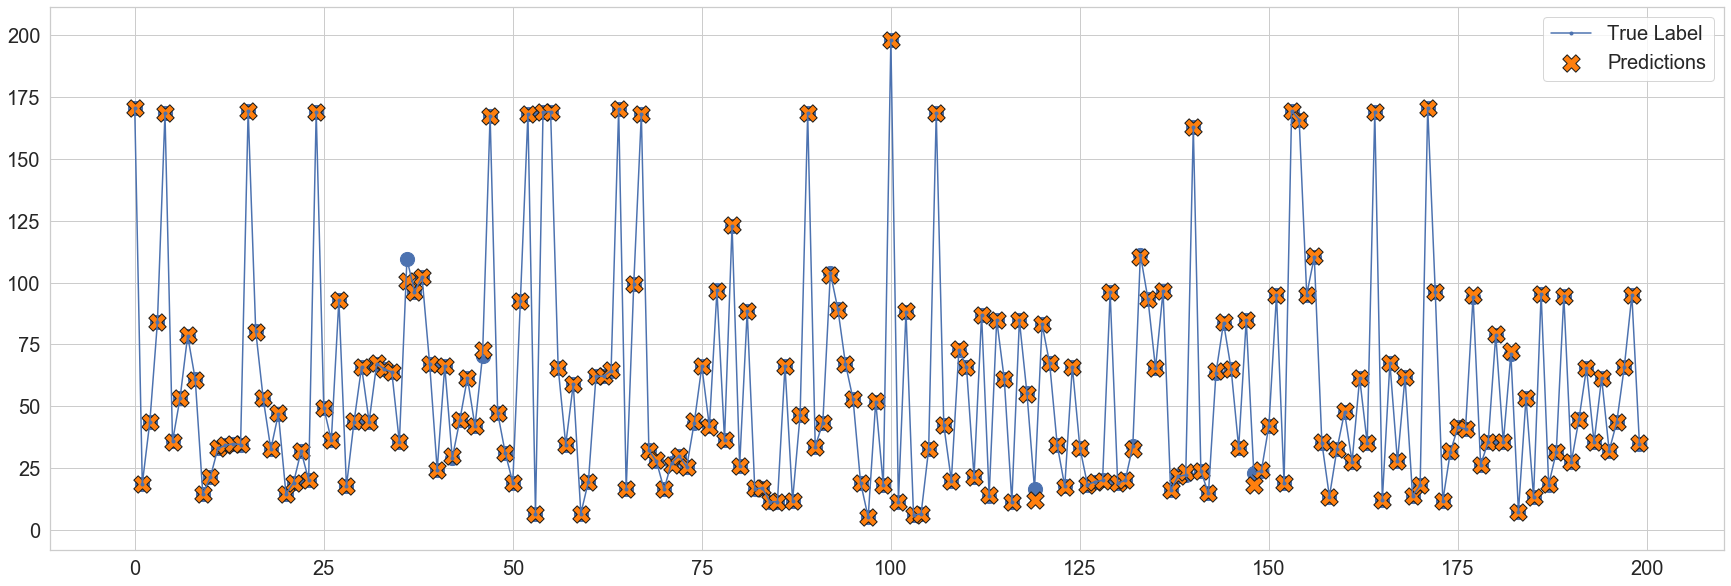

In [72]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
# load data
dataset = df
# split data into X and y
X = dataset.drop(columns='edge_traveltime')
Y = dataset['edge_traveltime']
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = RandomForestRegressor()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
mae = mean_absolute_error(y_test, y_pred)

print(mae)

import matplotlib.pyplot as plt
x = [i for i in range(200)]
plt.figure(figsize=(30,10))
plt.scatter(x,y_test[0:200], s = 200)
plt.plot(x,y_test[0:200],
         label='True Label', marker='.')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.scatter(x,y_pred[0:200],
          marker='X', edgecolors='k', label='Predictions',
          c='#ff7f0e', s=300)
plt.legend(fontsize=20)
plt.savefig('5.png', dpi=200)

In [73]:
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
model = LinearRegression()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

model = Ridge(alpha=0.1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


model = Lasso(alpha=0.1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


model = KNeighborsRegressor()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


model = RandomForestRegressor()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: -0.520 (0.060)
Accuracy: -0.520 (0.060)
Accuracy: -0.486 (0.061)
Accuracy: -6.792 (0.218)
Accuracy: -0.359 (0.063)
